# Digital Image Enhancement: Overview and Importance in Medical Imaging

**Image Enhancement Method:**
Image enhancement refers to the process of adjusting images to make them more suitable for specific applications. The goal is to enhance certain features of the image, making it more interpretable or visually pleasing. This process can involve increasing the contrast, sharpening edges, reducing noise, or adjusting brightness levels.

**Why Image Enhancement is Crucial in Processing Medical Images:**
In medical imaging, clarity and accuracy are paramount. Image enhancement helps in:
Highlighting Critical Details: Enhancing subtle structures in medical images can aid in accurate diagnosis.
Reducing Noise: Medical images often contain noise due to various factors, and enhancement techniques can reduce this noise.
Improving Contrast: Enhancing contrast helps in better differentiation between various tissues, organs, and abnormalities.
Assisting in Automated Diagnosis: Enhanced images improve the performance of algorithms used in computer-aided diagnosis (CAD) systems.

# **Classification of Image Enhancement Methods**


##Image enhancement methods can be broadly classified into:

**Spatial Domain Methods:**

-Operate directly on pixels.

-Examples: Histogram Equalization (HE), Gamma Correction.

**Frequency Domain Methods:**

-Operate on the Fourier transform of an image.

-Examples: Filtering techniques like Gaussian filters.

**Transform Domain Methods:**

-Operate on various transforms like Wavelet or DCT.

-Examples: Wavelet-based enhancement.

# **Image Enhancement Methods with Python Code**


## **Color Enhancement based method**

### Gamma Correction (Color Enhancement):
Description: Gamma correction adjusts the brightness and contrast of an image by applying a nonlinear transformation to the pixel values. This technique is useful for compensating for the nonlinear behavior of displays or improving the perceived quality of images. A higher gamma value lightens the image, while a lower gamma darkens it.

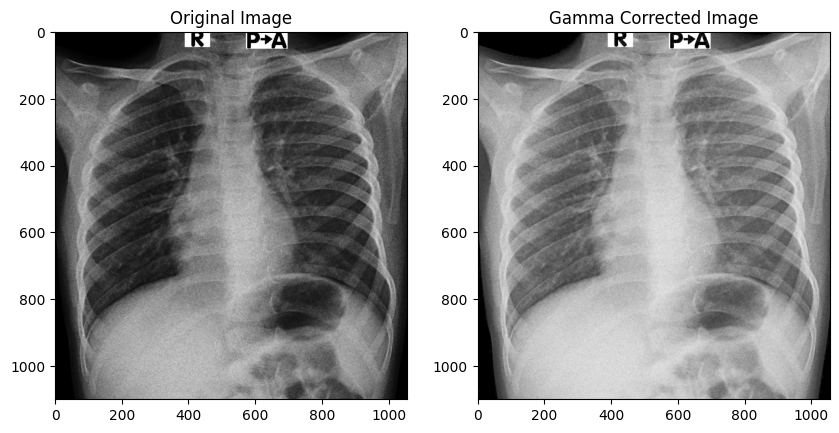

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Load image
image = cv2.imread('/content/n_58.png')
gamma_corrected = gamma_correction(image, gamma=2)

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Gamma Corrected Image')
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.show()


### Saturation Adjustment (Color Enhancement):
Description: Saturation adjustment modifies the intensity of the colors in an image. By increasing saturation, the colors appear more vibrant, while decreasing saturation results in a more muted or grayscale image. This technique is useful for enhancing certain features in medical images, such as highlighting tissues or organs in an MRI or CT scan.

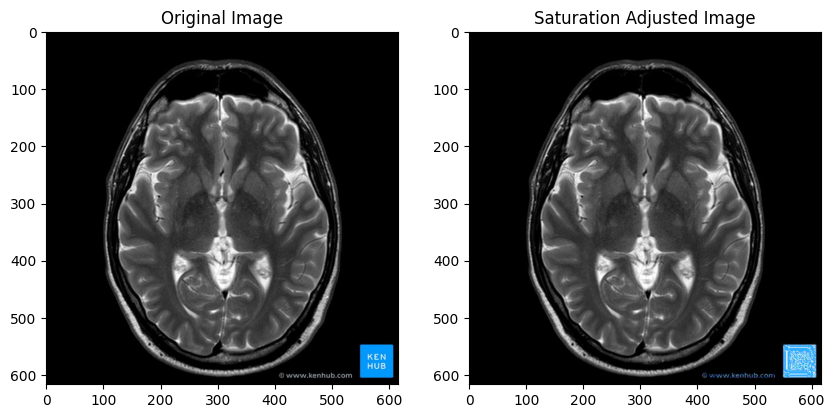

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_saturation(image, saturation_factor=1.5):
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Increase saturation by multiplying the saturation channel (index 1)
    hsv[:, :, 1] = hsv[:, :, 1] * saturation_factor

    # Convert back to BGR
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Load image
image = cv2.imread("/content/mri.jpg")
saturation_adjusted = adjust_saturation(image, saturation_factor=50)

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.subplot(1, 2, 2)
plt.title('Saturation Adjusted Image')
plt.imshow(cv2.cvtColor(saturation_adjusted, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.show()


## **Histogram-Based Methods**

### CLAHE (Contrast-Limited Adaptive Histogram Equalization):
Description: CLAHE is a refined version of histogram equalization that enhances contrast while limiting the amplification of noise. It divides the image into small regions (tiles) and applies histogram equalization to each region, preventing over-amplification of noise. This method is commonly used in medical imaging to improve the visibility of structures.

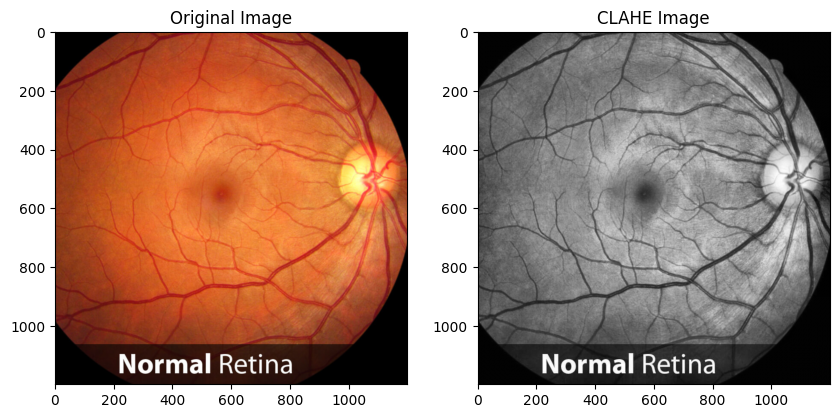

In [51]:
import cv2
import matplotlib.pyplot as plt

def apply_clahe(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_image = clahe.apply(gray_image)

    return clahe_image

# Load image
image = cv2.imread('/content/retina.png')
clahe_image = apply_clahe(image)

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.subplot(1, 2, 2)
plt.title('CLAHE Image')
plt.imshow(clahe_image, cmap='gray')  # Display CLAHE in grayscale
plt.show()


## **Spatial Filtering Methods**

### Averaging Filter (Spatial Filtering):
Description: The averaging filter smooths an image by replacing each pixel’s value with the average of its neighboring pixels. This helps in reducing noise and blurring unwanted details. It is often used in preprocessing steps to clean up images before further analysis.





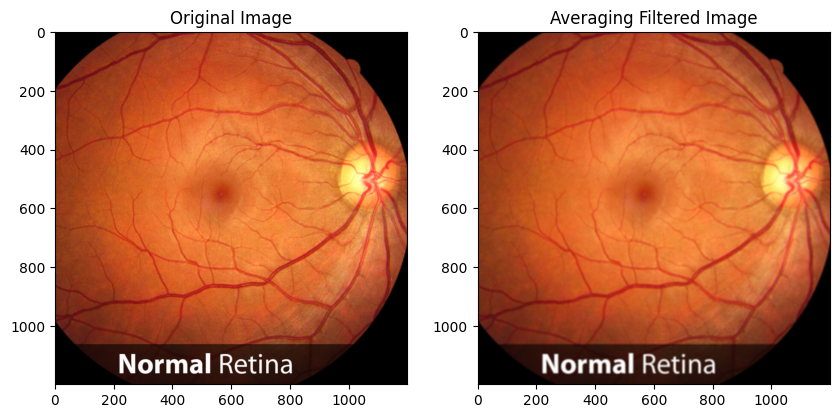

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_averaging_filter(image, kernel_size=3):
    # Create kernel for averaging filter
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)

    # Apply filter
    return cv2.filter2D(image, -1, kernel)

# Load image
image = cv2.imread('/content/retina.png')
averaging_filtered_image = apply_averaging_filter(image, kernel_size=7)

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.subplot(1, 2, 2)
plt.title('Averaging Filtered Image')
plt.imshow(cv2.cvtColor(averaging_filtered_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.show()


### Unsharp Masking (Spatial Filtering):
Description: Unsharp masking is a technique used to sharpen an image by subtracting a blurred version of the image from the original. This enhances edges and fine details, making features stand out more clearly. It is commonly used to improve image clarity.

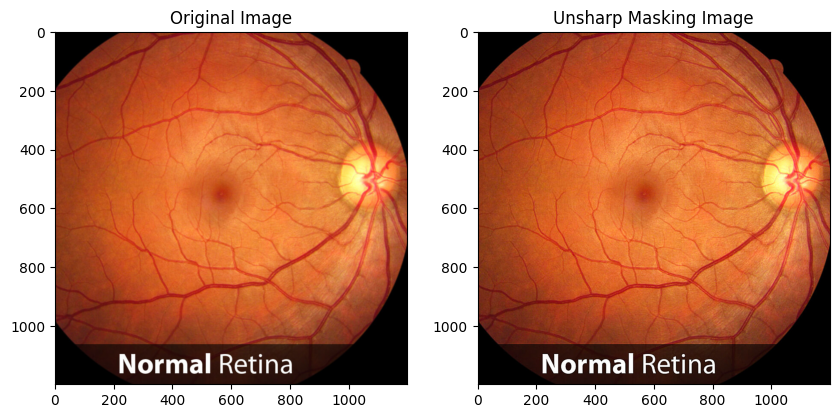

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def unsharp_masking(image, sigma=1.0, strength=1.5):
    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), sigma)

    # Subtract the blurred image from the original to create a sharpened version
    sharpened_image = cv2.addWeighted(image, 1 + strength, blurred_image, -strength, 0)

    return sharpened_image

# Load image
image = cv2.imread('/content/retina.png')
unsharp_image = unsharp_masking(image, sigma=1.0, strength=2.5)

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.subplot(1, 2, 2)
plt.title('Unsharp Masking Image')
plt.imshow(cv2.cvtColor(unsharp_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.show()


## **Frequency Domain Methods**

### Fourier Transformation (Frequency Domain Methods)
Description: Fourier transformation converts an image from the spatial domain to the frequency domain, enabling manipulation of the frequency components. Low-pass filtering removes high-frequency noise, while high-pass filtering emphasizes sharp features and edges. This technique is particularly useful for image compression and enhancement.



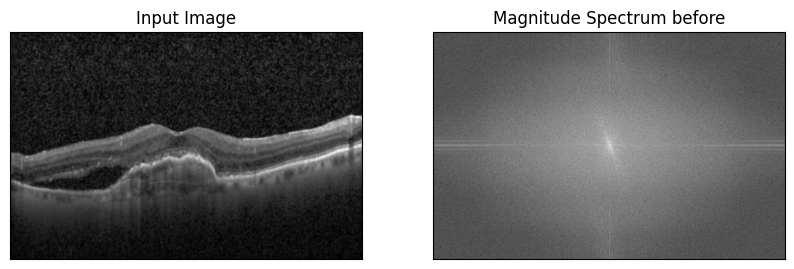

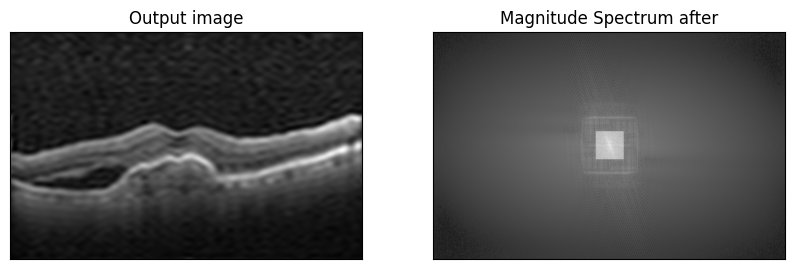

In [54]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/content/bone.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)  #real component and imaginary componant
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum before'), plt.xticks([]), plt.yticks([])
plt.show()

#=================================
rows, cols = img.shape
crow, ccol = rows//2, cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

# Plot the magnitude spectrum of the filtered image
dft_back = cv.dft(np.float32(img_back), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift_back = np.fft.fftshift(dft_back)
magnitude_spectrum_back = 20 * np.log(cv.magnitude(dft_shift_back[:,:,0], dft_shift_back[:,:,1]))


plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Output image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum_back, cmap = 'gray')
plt.title('Magnitude Spectrum after'), plt.xticks([]), plt.yticks([])
plt.show()